# Recurrent Neural Network

### Importing the libraries

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [12]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [13]:
print(training_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [14]:
training_set_size = len(training_set)
print("Training dataset size:", training_set_size)

Training dataset size: 1258


### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
print("Scaled Training dataset:",training_set_scaled)

Scaled Training dataset: [[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


### Creating a data structure with 60 timesteps and 1 output

In [7]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

### Importing the Keras libraries and packages

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [10]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [15]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [16]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [17]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [18]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [19]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [20]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [21]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 10s 84ms/step - loss: 0.0406
Epoch 2/100
38/38 [==============================] - 4s 94ms/step - loss: 0.0065
Epoch 3/100
38/38 [==============================] - 3s 86ms/step - loss: 0.0054
Epoch 4/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 3s 84ms/step - loss: 0.0054
Epoch 6/100
38/38 [==============================] - 4s 97ms/step - loss: 0.0062
Epoch 7/100
38/38 [==============================] - 3s 85ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 3s 84ms/step - loss: 0.0045
Epoch 9/100
38/38 [==============================] - 3s 92ms/step - loss: 0.0043
Epoch 10/100
38/38 [==============================] - 3s 90ms/step - loss: 0.0040
Epoch 11/100
38/38 [==============================] - 3s 84ms/step - loss: 0.0041
Epoch 12/100
38/38 [==============================] - 3s 85ms/step - loss: 0.0051
Epoch 13/100
38/38 [====

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [27]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
# Calculate the range of values in the real_stock_price array
range_of_values = np.ptp(real_stock_price)

print("Range of values:", range_of_values)

Range of values: 59.0


### Getting the predicted stock price of 2017

In [23]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 1s/step


### Visualising the results

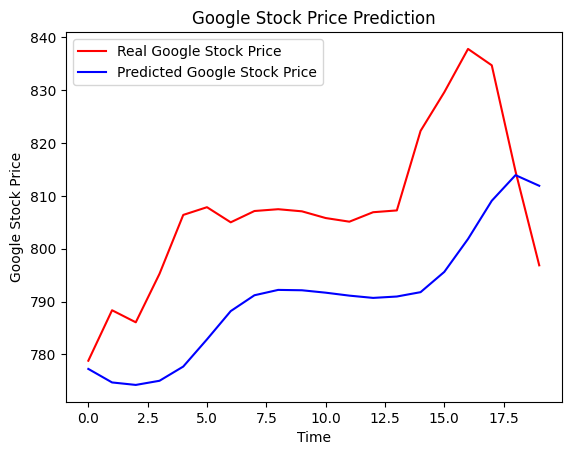

In [24]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [28]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(rmse/59)

0.3466994919207061
